In [1]:
# https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [63]:
plt.rcParams['figure.figsize'] = (6.6,4.4)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'

In [3]:
f = h5py.File('shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5', 'r')

In [4]:
list(f.keys())

['DSV_00',
 'DSV_01',
 'DSV_02',
 'DSV_03',
 'DSV_04',
 'DSV_05',
 'DSV_06',
 'U',
 'Uk',
 'eta',
 'k',
 'rad_im_10_HH',
 'rad_im_10_VV',
 'rad_im_28_HH',
 'rad_im_28_VV',
 'rad_im_45_HH',
 'rad_im_45_VV',
 't',
 'x',
 'y',
 'z']

In [5]:
k = f.get('k')

In [6]:
k = np.array(k)

In [7]:
eta = f.get('eta')

In [8]:
thing = np.array(eta)
et_t_0 = thing[0]
et_t_0

array([[ 0.3188747 , -0.051571  , -0.19134583, ..., -0.61840206,
        -0.45398623, -0.367469  ],
       [ 0.20896323, -0.35599038, -0.5280668 , ..., -0.42741668,
        -0.41712007, -0.406138  ],
       [ 0.21958362, -0.2579806 , -0.63820916, ..., -0.3204471 ,
        -0.3593373 , -0.22888723],
       ...,
       [-0.23685099, -0.35268968, -0.25271463, ...,  0.46847686,
         0.41217268,  0.2466789 ],
       [-0.21208242, -0.4628403 , -0.4743927 , ...,  0.21041556,
         0.04162848,  0.13339517],
       [ 0.05637982, -0.13221158, -0.35909912, ...,  0.19136415,
        -0.07946533,  0.01488742]], dtype=float32)

## 1) Current Profile 

In [9]:
z = f.get('z')

In [10]:
z = np.array(z)
z

array([-20.        , -19.7979798 , -19.5959596 , -19.39393939,
       -19.19191919, -18.98989899, -18.78787879, -18.58585859,
       -18.38383838, -18.18181818, -17.97979798, -17.77777778,
       -17.57575758, -17.37373737, -17.17171717, -16.96969697,
       -16.76767677, -16.56565657, -16.36363636, -16.16161616,
       -15.95959596, -15.75757576, -15.55555556, -15.35353535,
       -15.15151515, -14.94949495, -14.74747475, -14.54545455,
       -14.34343434, -14.14141414, -13.93939394, -13.73737374,
       -13.53535354, -13.33333333, -13.13131313, -12.92929293,
       -12.72727273, -12.52525253, -12.32323232, -12.12121212,
       -11.91919192, -11.71717172, -11.51515152, -11.31313131,
       -11.11111111, -10.90909091, -10.70707071, -10.50505051,
       -10.3030303 , -10.1010101 ,  -9.8989899 ,  -9.6969697 ,
        -9.49494949,  -9.29292929,  -9.09090909,  -8.88888889,
        -8.68686869,  -8.48484848,  -8.28282828,  -8.08080808,
        -7.87878788,  -7.67676768,  -7.47474747,  -7.27

In [11]:
U = f.get('U')

In [12]:
U = np.array(U)
U

array([0.06831564, 0.06907082, 0.06985713, 0.07067587, 0.07152837,
       0.07241601, 0.07334025, 0.07430261, 0.07530464, 0.07634798,
       0.07743434, 0.0785655 , 0.0797433 , 0.08096965, 0.08224658,
       0.08357615, 0.08496054, 0.08640201, 0.08790291, 0.0894657 ,
       0.09109293, 0.09278725, 0.09455143, 0.09638834, 0.098301  ,
       0.10029252, 0.10236615, 0.10452528, 0.10677343, 0.10911428,
       0.11155164, 0.1140895 , 0.116732  , 0.11948345, 0.12234835,
       0.12533137, 0.12843739, 0.13167147, 0.1350389 , 0.13854517,
       0.14219601, 0.14599738, 0.14995549, 0.15407679, 0.15836802,
       0.16283619, 0.16748858, 0.1723328 , 0.17737675, 0.18262867,
       0.18809713, 0.19379107, 0.19971977, 0.20589293, 0.21232061,
       0.21901332, 0.22598197, 0.23323795, 0.24079311, 0.24865977,
       0.25685079, 0.26537953, 0.27425993, 0.28350648, 0.29313428,
       0.30315904, 0.31359714, 0.32446561, 0.33578221, 0.34756541,
       0.35983445, 0.37260935, 0.38591098, 0.39976106, 0.41418

Text(0.5, 1.0, 'Current Depth Profile')

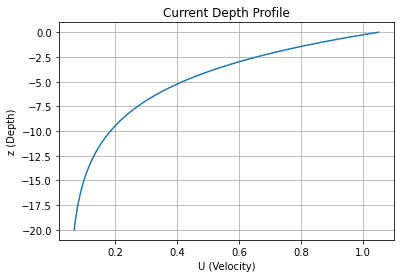

In [13]:
plt.plot(U,z)

plt.grid(True)
plt.xlabel('U (Velocity)')
plt.ylabel('z (Depth)')
plt.title('Current Depth Profile')
 

## 2) Surface Elevation

In [14]:
eta = f.get('eta')

In [15]:
eta = np.array(eta)

In [16]:
eta

array([[[ 0.3188747 , -0.051571  , -0.19134583, ..., -0.61840206,
         -0.45398623, -0.367469  ],
        [ 0.20896323, -0.35599038, -0.5280668 , ..., -0.42741668,
         -0.41712007, -0.406138  ],
        [ 0.21958362, -0.2579806 , -0.63820916, ..., -0.3204471 ,
         -0.3593373 , -0.22888723],
        ...,
        [-0.23685099, -0.35268968, -0.25271463, ...,  0.46847686,
          0.41217268,  0.2466789 ],
        [-0.21208242, -0.4628403 , -0.4743927 , ...,  0.21041556,
          0.04162848,  0.13339517],
        [ 0.05637982, -0.13221158, -0.35909912, ...,  0.19136415,
         -0.07946533,  0.01488742]],

       [[-0.02522024, -0.01897904, -0.03870581, ...,  0.00308467,
          0.05296471,  0.1361032 ],
        [-0.00766731, -0.05350234, -0.0428537 , ..., -0.4114969 ,
         -0.31924137, -0.19018398],
        [ 0.09891742, -0.38407376, -0.5005019 , ..., -0.34741926,
         -0.34158313, -0.24280623],
        ...,
        [ 0.13938859,  0.41906053,  0.5270646 , ...,  

In [17]:
x = f.get('x')
y = f.get('y')

In [18]:
x = np.array(x)
y = np.array(y)

### When T = 0

In [19]:
et_t_0 = eta[0]
et_t_0
# when time = 0

array([[ 0.3188747 , -0.051571  , -0.19134583, ..., -0.61840206,
        -0.45398623, -0.367469  ],
       [ 0.20896323, -0.35599038, -0.5280668 , ..., -0.42741668,
        -0.41712007, -0.406138  ],
       [ 0.21958362, -0.2579806 , -0.63820916, ..., -0.3204471 ,
        -0.3593373 , -0.22888723],
       ...,
       [-0.23685099, -0.35268968, -0.25271463, ...,  0.46847686,
         0.41217268,  0.2466789 ],
       [-0.21208242, -0.4628403 , -0.4743927 , ...,  0.21041556,
         0.04162848,  0.13339517],
       [ 0.05637982, -0.13221158, -0.35909912, ...,  0.19136415,
        -0.07946533,  0.01488742]], dtype=float32)

In [20]:
index, = np.where(x == 5)
index
# Value of x in the middle of data set
# corresponds to x = 5

array([34], dtype=int64)

In [21]:
eta_t0_x5 = et_t_0[:,34]
# Gets the 34th column in data matrix 

Text(0.5, 1.0, 'Free Surface Profile when T=0 at Slice x=5')

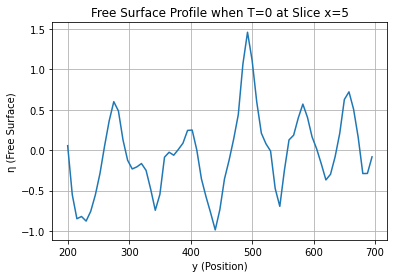

In [22]:
plt.plot(y,eta_t0_x5)

plt.grid(True)
plt.xlabel('y (Position)')
plt.ylabel('η (Free Surface)')
plt.title('Free Surface Profile when T=0 at Slice x=5')


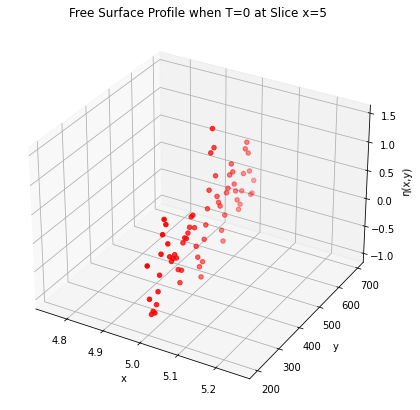

In [23]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(5, y, eta_t0_x5, color = "red")
plt.title("Free Surface Profile when T=0 at Slice x=5")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('η(x,y)')
 
# show plot
plt.show()

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


C:\Users\josep\Documents\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<IPython.core.display.Javascript object>


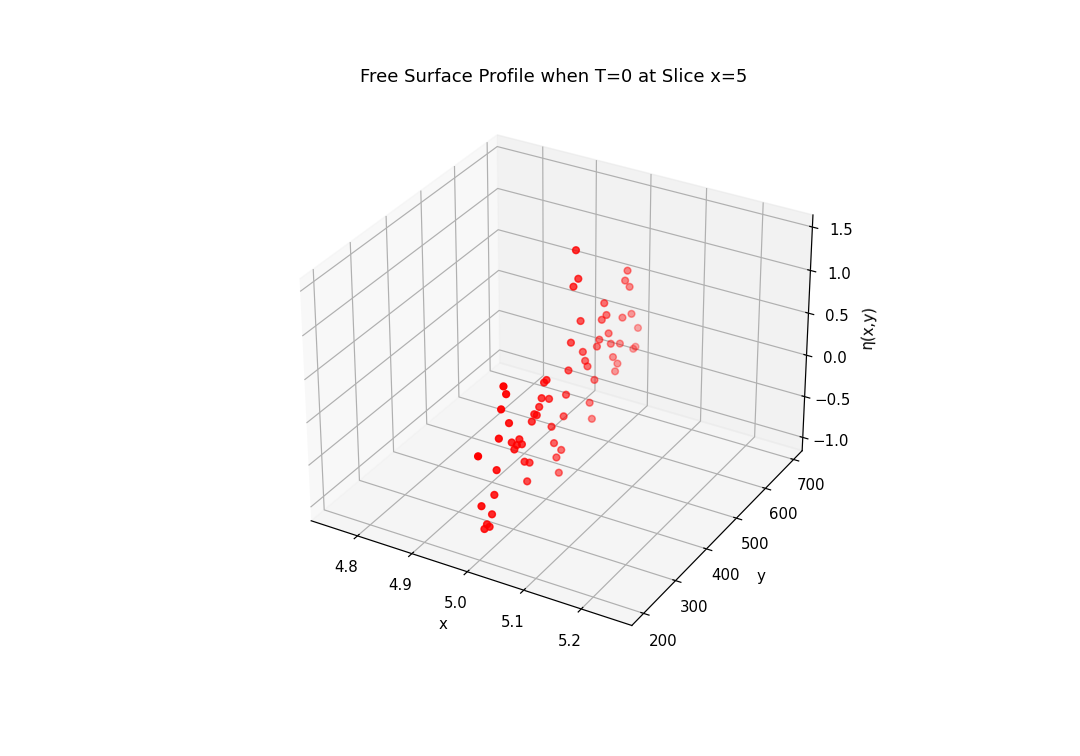

In [25]:
%matplotlib inline  
%matplotlib notebook
%pylab

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(5, y, eta_t0_x5, color = "red")
plt.title("Free Surface Profile when T=0 at Slice x=5")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('η(x,y)')
 
# show plot
plt.show()

## Free Surface at T = 0

Method used - https://stackoverflow.com/questions/51152043/creating-a-3d-surface-plot-from-three-1d-arrays

In [24]:
x = f.get('x')
y = f.get('y')

In [25]:
x = np.array(x)
y = np.array(y)

In [26]:
# Define the initial values and the number of repetitions
values = x
repetitions = 67

# Create the array following the pattern
x_new_form = [value for value in values for _ in range(repetitions)]

In [27]:
x_matrix = np.reshape(x_new_form, (67, 67))
x_matrix

array([[-250. , -250. , -250. , ..., -250. , -250. , -250. ],
       [-242.5, -242.5, -242.5, ..., -242.5, -242.5, -242.5],
       [-235. , -235. , -235. , ..., -235. , -235. , -235. ],
       ...,
       [ 230. ,  230. ,  230. , ...,  230. ,  230. ,  230. ],
       [ 237.5,  237.5,  237.5, ...,  237.5,  237.5,  237.5],
       [ 245. ,  245. ,  245. , ...,  245. ,  245. ,  245. ]])

In [28]:
# Define the initial value, increment, and the number of repetitions
initial_value = y[0]
increment = 7.5
repetitions = 67

# Create the list following the pattern
y_new_form = [initial_value + i * increment for i in range(repetitions)]

# Repeat the list 67 times
y_new_form = y_new_form * 67

In [29]:
y_matrix = np.reshape(y_new_form, (67, 67))
y_matrix

array([[200. , 207.5, 215. , ..., 680. , 687.5, 695. ],
       [200. , 207.5, 215. , ..., 680. , 687.5, 695. ],
       [200. , 207.5, 215. , ..., 680. , 687.5, 695. ],
       ...,
       [200. , 207.5, 215. , ..., 680. , 687.5, 695. ],
       [200. , 207.5, 215. , ..., 680. , 687.5, 695. ],
       [200. , 207.5, 215. , ..., 680. , 687.5, 695. ]])

In [30]:
z_matrix = np.transpose(et_t_0)

z_matrix

array([[ 0.3188747 ,  0.20896323,  0.21958362, ..., -0.23685099,
        -0.21208242,  0.05637982],
       [-0.051571  , -0.35599038, -0.2579806 , ..., -0.35268968,
        -0.4628403 , -0.13221158],
       [-0.19134583, -0.5280668 , -0.63820916, ..., -0.25271463,
        -0.4743927 , -0.35909912],
       ...,
       [-0.61840206, -0.42741668, -0.3204471 , ...,  0.46847686,
         0.21041556,  0.19136415],
       [-0.45398623, -0.41712007, -0.3593373 , ...,  0.41217268,
         0.04162848, -0.07946533],
       [-0.367469  , -0.406138  , -0.22888723, ...,  0.2466789 ,
         0.13339517,  0.01488742]], dtype=float32)

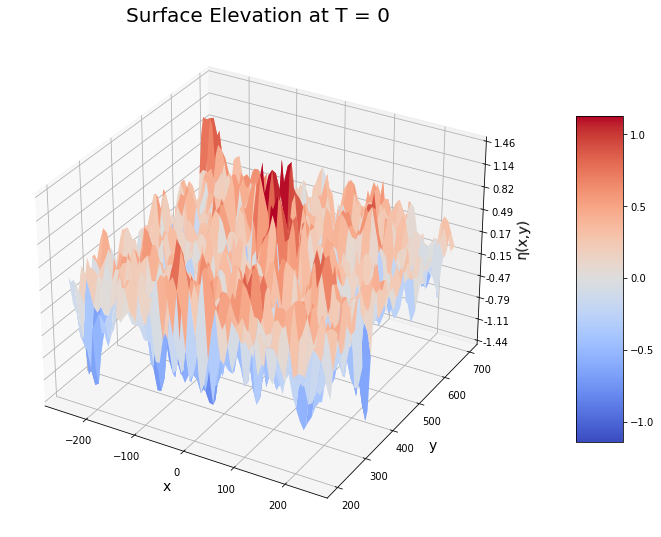

In [54]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_matrix, y_matrix, z_matrix, cmap=cm.coolwarm)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('η(x,y)',fontsize=14)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=7, location = 'right', pad = 0.1)

plt.title('Surface Elevation at T = 0', fontsize=20)

plt.show()

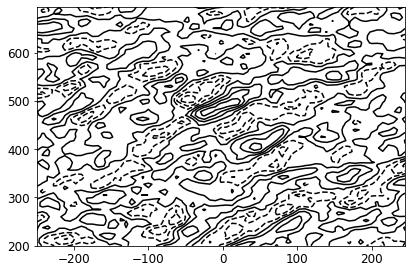

In [74]:
plt.contour(x_matrix, y_matrix, z_matrix, colors='black');

Text(0.5, 1.0, 'Contour Plot of Surface Elevation at T = 0')

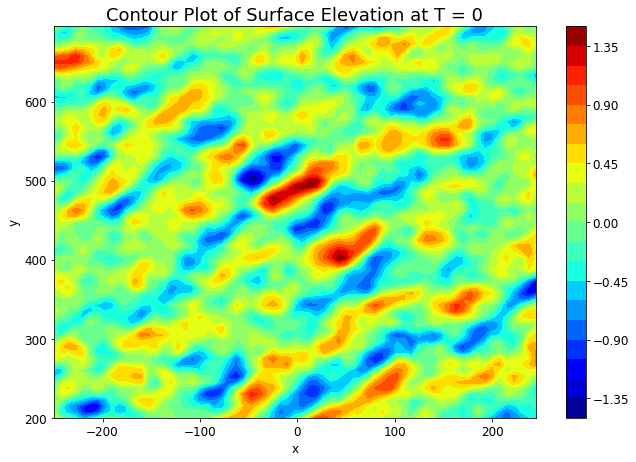

In [73]:
plt.figure(figsize=(10.8,7.2))
plt.contourf(x_matrix, y_matrix, z_matrix, 20, cmap='jet')
plt.colorbar()

plt.xlabel("x")
plt.ylabel("y")
plt.title("Contour Plot of Surface Elevation at T = 0", fontsize=18)

## When T = 1

In [26]:
et_t_1 = eta[1]
et_t_1
# when time = 1

array([[-0.02522024, -0.01897904, -0.03870581, ...,  0.00308467,
         0.05296471,  0.1361032 ],
       [-0.00766731, -0.05350234, -0.0428537 , ..., -0.4114969 ,
        -0.31924137, -0.19018398],
       [ 0.09891742, -0.38407376, -0.5005019 , ..., -0.34741926,
        -0.34158313, -0.24280623],
       ...,
       [ 0.13938859,  0.41906053,  0.5270646 , ...,  0.25925386,
         0.34423435,  0.11668242],
       [-0.12703113, -0.122667  ,  0.08215402, ...,  0.29276308,
         0.3579793 ,  0.15853676],
       [-0.22630936, -0.3567526 , -0.19567634, ...,  0.07427777,
        -0.00834213,  0.12570266]], dtype=float32)

In [27]:
eta_t1_x5 = et_t_1[:,34]
# Gets the 34th column in data matrix 

In [28]:
plt.plot(y,eta_t1_x5)

plt.grid(True)
plt.xlabel('y (Position)')
plt.ylabel('η (Free Surface)')
plt.title('Free Surface Profile when T=1 at Slice x=5')

Text(0.5, 0.92, 'Free Surface Profile when T=1 at Slice x=5')

You can see there is a different between the middle slice of the data cube at T = 0 and at T = 1